In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyqg
from PIL import Image
from pyqg import diagnostic_tools as tools
from collections import OrderedDict

In [90]:
def splitmosaic(pix, res=128):
    N1 = pix.shape[0]/res
    N2 = pix.shape[1]/res
    return [pix[res*i:res*(i+1), res*j:res*(j+1)].reshape(1, res, res).astype(float) for i in range(N1) for j in range(N2)]

In [91]:
res = 128 # resolution of images

In [92]:
pic = Image.open("reals.png")
pix = np.array(pic)
reals = splitmosaic(pix, res)

In [93]:
pic = Image.open("fakes007813.png")
pix = np.array(pic)
fakes = splitmosaic(pix, res)

In [104]:
%%time
E, energy, enstrophy, kr, energy_iso, enstrophy_iso, Ef, energyf, enstrophyf, krf, energy_isof, enstrophy_isof = [], [], [], [], [], [], [], [], [], [], [], []
for real in reals:
    m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
    m.set_q(real)
    m.run()
    E.append(m._calc_ke())
    energy.append(m.get_diagnostic('KEspec'))
    enstrophy.append(m.get_diagnostic('Ensspec'))
    _kr, _energy_iso = tools.calc_ispec(m,energy[-1].squeeze())
    kr.append(_kr)
    energy_iso.append(_energy_iso)
    _, _enstrophy_iso = tools.calc_ispec(m,enstrophy[-1].squeeze())
    enstrophy_iso.append(_enstrophy_iso)
for fake in fakes:
    m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
    m.set_q(fake)
    m.run()
    Ef.append(m._calc_ke())
    energyf.append(m.get_diagnostic('KEspec'))
    enstrophyf.append(m.get_diagnostic('Ensspec'))
    _krf, _energy_isof = tools.calc_ispec(m,energyf[-1].squeeze())
    krf.append(_krf)
    energy_isof.append(_energy_isof)
    _, _enstrophy_isof = tools.calc_ispec(m,enstrophyf[-1].squeeze())
    enstrophy_isof.append(_enstrophy_isof)

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logge

CPU times: user 50.5 s, sys: 1.04 s, total: 51.6 s
Wall time: 8.67 s


Text(0.5,1,'Energy Spectrum')

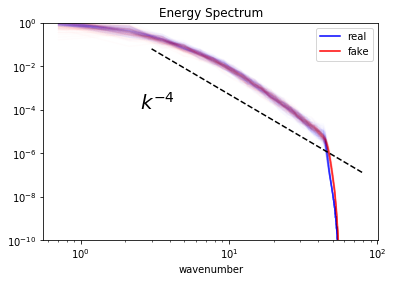

In [115]:
fig, ax = plt.subplots()
ks = np.array([3.,80])
es = 5*ks**-4
for i in range(len(kr)):
    ax.loglog(kr[i],energy_iso[i], c='b', alpha=0.01, label='real')
for i in range(len(krf)):
    ax.loglog(krf[i],energy_isof[i], c='r', alpha=0.01, label='fake')
ax.loglog(ks,es,'k--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg=plt.legend(by_label.values(), by_label.keys())
for l in leg.get_lines():
    l.set_alpha(1)
ax.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
ax.set_ylim([1.e-10,1.e0])
ax.set_xlabel('wavenumber')
ax.set_title('Energy Spectrum')

Text(0.5,1,'Enstrophy Spectrum')

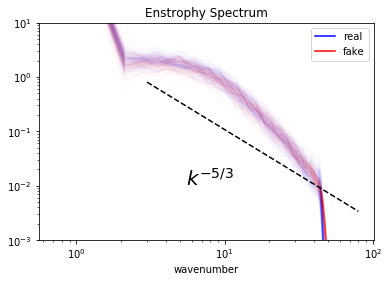

In [117]:
fig, ax = plt.subplots()
ks = np.array([3.,80])
es = 5*ks**(-5./3)
for i in range(len(kr)):
    ax.loglog(kr[i],enstrophy_iso[i], c='b', alpha=0.01, label='real')
for i in range(len(krf)):
    ax.loglog(krf[i],enstrophy_isof[i], c='r', alpha=0.01, label='fake')
ax.loglog(ks,es,'k--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg=plt.legend(by_label.values(), by_label.keys())
for l in leg.get_lines():
    l.set_alpha(1)
ax.text(5.5,.01,r'$k^{-5/3}$',fontsize=20)
ax.set_ylim([1.e-3,1.e1])
ax.set_xlabel('wavenumber')
ax.set_title('Enstrophy Spectrum')

In [39]:
%%time
Nout = 10
tmax = 1
times = np.linspace(m.t, tmax, Nout)
KE = np.zeros(Nout)
PE = np.zeros(Nout)
for i, time in enumerate(times):
    m.tmax = time
    m.run()
    KE[i] = m._calc_ke()
    PE[i] = (m.q**2).sum()

INFO: Step: 1000, Time: 1.00e+00, KE: 2.55e+00, CFL: 0.134


CPU times: user 10.2 s, sys: 81.6 ms, total: 10.3 s
Wall time: 1.72 s


In [48]:
%%time
Nout = 10
tmax = 1
times = np.linspace(m2.t, tmax, Nout)
KE2 = np.zeros(Nout)
PE2 = np.zeros(Nout)
for i, time in enumerate(times):
    m2.tmax = time
    m2.run()
    KE2[i] = m2._calc_ke()
    PE2[i] = (m2.q**2).sum()

INFO: Step: 1000, Time: 1.00e+00, KE: 2.98e+00, CFL: 0.120


CPU times: user 10.7 s, sys: 113 ms, total: 10.8 s
Wall time: 1.82 s


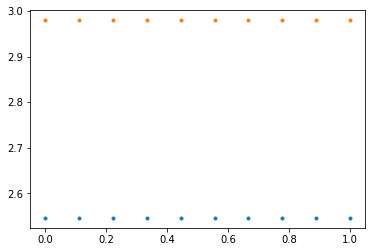

In [49]:
fig, ax = plt.subplots()
ax.plot(times, KE, '.')
ax.plot(times, KE2, '.')